In [66]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
#from random import normal

In [382]:
np.random.seed(0)
dis1=np.random.normal(0,1,50)
dis2=np.random.normal(5,1,50)
dis3=np.random.normal(10,1,50)
Y=[0,5,10]
K=3
pi=3.14

In [383]:
A=np.concatenate([dis1,dis2])
X=np.concatenate([A,dis3])
X.shape

(150,)

C:\Users\vaish\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  after removing the cwd from sys.path.


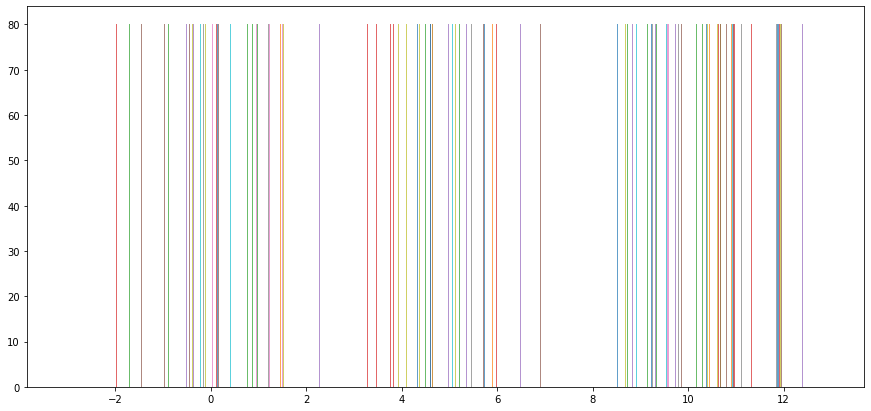

<Figure size 1080x504 with 0 Axes>

In [384]:
def plot_hist(data):
    plt.figure(figsize=(15,7))
    for x in data:
        plt.hist(x, bins = 80, normed = True, alpha = 0.7)
    #plt.xlim(-10, 20)
    plt.figure(figsize=(15,7))
    
plot_hist(X)

In [385]:

#posterior probability that each input belongs to each of the 3 gaussians
postprob=np.zeros((len(X),K),dtype=float)
postprob

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0

In [386]:
def initialize(X,K):
    #meanli=[]
    #for i in range(K):    
    m=np.random.choice(X,size=3)
    v=np.ones((3))
    w=np.ones((K))/K
    #posterior probability that each input belongs to each of the 3 gaussians
    posterior=np.zeros((len(X),K),dtype=float)
    
    
        
    return m,v,w,posterior

In [387]:
means,var,wprior,posterior=initialize(X,K)
means,var,wprior,posterior.shape

(array([5.0519454 , 8.65224094, 8.50874241]),
 array([1., 1., 1.]),
 array([0.33333333, 0.33333333, 0.33333333]),
 (150, 3))

In [388]:
X[1]

0.4001572083672233

In [389]:
wprior.shape, part4.shape

((3,), (3,))

In [390]:
K=3
iterations=1
for iter in range(iterations):
    
    for i in range(len(X)):

        part1 = 1/((2*pi*(var))**0.5)
        part2=-1*((X[i]-means)**2)
        part3= part2/(2*var)
        part4=np.exp(part3)
        posterior[i]=wprior*part4                          #unnormalised
        posterior[i]=posterior[i]/np.sum(posterior[i])    #normalised posterior probabilities so that it sums to 1 


    
    N=len(X)
    for i in range(K):
        wprior[i]=np.sum(posterior[:,i])/N
        means[i]=np.dot(posterior[:,i],X)/(np.sum(posterior[:,i]))
        var[i]=np.dot(posterior[:,i],(X-means[i]))/(np.sum(posterior[:,i]))
     
    means,var


        

In [391]:

means, var

(array([ 2.44671641, 10.16548636,  9.91553447]),
 array([ 3.29025091e-16, -1.84195475e-15, -4.69478327e-17]))

In [393]:
loss=Y-means
loss

array([-2.44671641, -5.16548636,  0.08446553])

(3,)

(array([-0.72775446,  0.49602859,  6.86303327]),
 array([1.94964331e-16, 5.73279218e-17, 7.57639803e-16]))

In [257]:
#def Gaussian(X,K):
    
#means,var,wprior=initialize(X,K)